In [1]:
import sys
import os
from mpasanalysis import *
%matplotlib inline

In [2]:
def plot_hlines(yfrac, axis=None, **kwargs):
    if axis is None:
        axis = plt.gca()
    ymin, ymax = axis.get_ylim()
    yf = ymin+yfrac*(ymax-ymin)
    plt.axhline(yf, **kwargs)
def plot_vlines(xfrac, axis=None, **kwargs):
    if axis is None:
        axis = plt.gca()
    xmin, xmax = axis.get_xlim()
    xf = xmin+xfrac*(xmax-xmin)
    plt.axvline(xf, **kwargs)

In [3]:
npart = 16
# root_dir = os.environ['HOME']+'/scratch/summit/sp_warm_filament'
root_dir = os.environ['HOME']+'/scratch/superparameterization/sp_warm_filament'
graph_file = root_dir+'/graph.info.part.{:d}'.format(npart)
mesh_file = root_dir+'/init.nc'
# figdir = os.environ['HOME']+'/work/superParameterization/sp_mixed_layer_eddy'
figdir = os.environ['HOME']+'/work/superParameterization/sp_warm_filament'
os.makedirs(figdir, exist_ok=True)
savefig = True

Reading mesh data from /Users/qingli/scratch/superparameterization/sp_warm_filament/init.nc


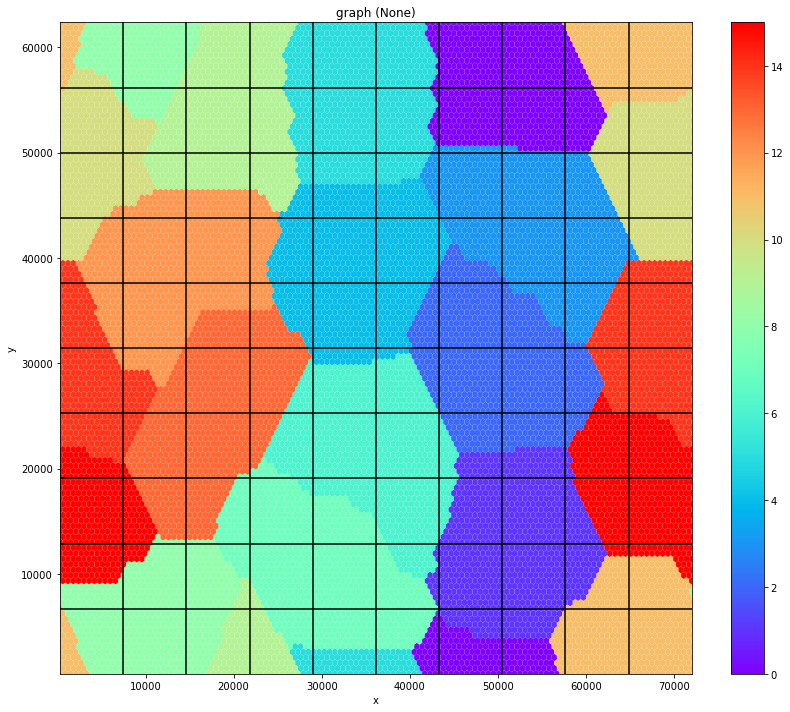

In [4]:
# graph file
data = np.loadtxt(graph_file)
mesh = MPASMesh(filepath=mesh_file)
graph = MPASODomain(data=data, mesh=mesh, position='cell', name='graph')
fig = plt.figure(figsize=[12,10])
levels = np.linspace(0,npart-1,npart)
graph.plot(levels=levels, cmap='rainbow')
axis = plt.gca()
for frac in np.linspace(0.1,0.9, 9):
    plot_vlines(frac, axis=axis, color='k')
    plot_hlines(frac, axis=axis, color='k')

# save figures
if savefig:
    plt.tight_layout()
    assert figdir is not None, 'figdir required.'
    figname = figdir+'/graph_{:d}.pdf'.format(npart)
    fig.savefig(figname, dpi = 300) 

In [5]:
levels

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15.])